# TO DO
- Feature engineering the name of passangers to find useful information (Master., Mr., Mrs., Miss., Don., Rev., Dr.)
- How to deal with ages?
- Is pclass better to be treated as dummy_variables (three columns) or just the way it is?


# Importing data and libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Cleaning and organizing data

## Dealing with null values
In both train and test data, we have null values to deal with.

- Train: Age, Cabin and Embarked columns
- Test: Age and Cabin

The Cabin column, in both dataframes, is missing a lot of values. Let's drop that column.
In train data we have only 1 missing value in 'Embarked' column, let's drop that too.
That leaves us with 'Age' column to deal with. It seems an important column and a lot of values are missing.

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
train_df = train_data.drop('Cabin', axis=1)
test_df = test_data.drop('Cabin', axis=1)

In [6]:
train_df.groupby(['Sex', 'Pclass']).Age.agg(['min', 'max', 'mean', 'median', 'std'])

min   max       mean  median        std
Sex    Pclass                                          
female 1       2.00  63.0  34.611765    35.0  13.612052
       2       2.00  57.0  28.722973    28.0  12.872702
       3       0.75  63.0  21.750000    21.5  12.729964
male   1       0.92  80.0  41.281386    40.0  15.139570
       2       0.67  70.0  30.740707    30.0  14.793894
       3       0.42  74.0  26.507589    25.0  12.159514

In [7]:
test_df.groupby(['Sex', 'Pclass']).Age.agg(['min', 'max', 'mean', 'median', 'std'])

min   max       mean  median        std
Sex    Pclass                                           
female 1       18.00  76.0  41.333333    41.0  14.541698
       2        0.92  60.0  24.376552    24.0  12.697827
       3        0.17  47.0  23.073400    22.0  11.128369
male   1        6.00  67.0  40.520000    42.0  13.507352
       2        2.00  63.0  30.940678    28.0  12.610233
       3        0.33  60.5  24.525104    24.0  10.240251

Both train and test dataframes have a lot of variation in Age data, even grouping in Class and Sex. Let's see if we can improve this extracting information from the title's names...

In [8]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [9]:
# Function to extract the personal title from name
def get_personal_titles(name):
    titles = ['Master.','Mr.','Mrs.','Miss.','Don.','Rev.','Dr.']
    for i in titles:
        if i in name:
            return i
    return 'Other'

train_df['Ptitle'] = train_df.Name.apply(get_personal_titles)
test_df['Ptitle'] = test_df.Name.apply(get_personal_titles)

In [10]:
# Append both dataframes to get more data on Age
full_df = pd.concat([train_df, test_df], ignore_index=True)

In [11]:
# Group ages per Pclass, Sex and Ptitle
full_df.groupby(['Pclass', 'Sex', 'Ptitle']).Age.mean()

Pclass  Sex     Ptitle 
1       female  Dr.        49.000000
                Miss.      30.338983
                Mrs.       43.208955
                Other      32.000000
        male    Don.       40.000000
                Dr.        44.750000
                Master.     6.984000
                Mr.        41.450758
                Other      52.222222
2       female  Miss.      20.717083
                Mrs.       33.518519
                Other      28.000000
        male    Dr.        38.500000
                Master.     2.757273
                Mr.        32.346715
                Rev.       41.250000
3       female  Miss.      17.360874
                Mrs.       32.326531
                Other            NaN
        male    Master.     6.090000
                Mr.        28.318910
Name: Age, dtype: float64

In [12]:
# Find Index of NaN value
full_df[(full_df.Sex=='female') & (full_df.Pclass==3) & (full_df.Ptitle=='Other')].Age

979   NaN
Name: Age, dtype: float64

In [13]:
# Fill NaN value with mean age per Pclass per Sex
full_df.loc[979, 'Age'] = full_df.groupby(['Pclass', 'Sex']).Age.mean()[3]['female']

In [14]:
# Check group ages per Pclass, Sex and Ptitle again
median_age = full_df.groupby(['Pclass', 'Sex', 'Ptitle']).Age.median()
median_age

Pclass  Sex     Ptitle 
1       female  Dr.        49.000000
                Miss.      30.000000
                Mrs.       45.000000
                Other      28.500000
        male    Don.       40.000000
                Dr.        47.000000
                Master.     6.000000
                Mr.        41.500000
                Other      52.000000
2       female  Miss.      20.000000
                Mrs.       30.500000
                Other      28.000000
        male    Dr.        38.500000
                Master.     2.000000
                Mr.        30.000000
                Rev.       41.500000
3       female  Miss.      18.000000
                Mrs.       31.000000
                Other      22.185329
        male    Master.     6.000000
                Mr.        26.000000
Name: Age, dtype: float64

In [15]:
# Fill NaN values with mean Age per Pclass, Sex and Ptitle
train_df['Age'] = train_df.apply(
                lambda row: round(median_age[row['Pclass']][row['Sex']][row['Ptitle']])
                  if pd.isnull(row['Age']) else row['Age'], axis=1)

test_df['Age'] = test_df.apply(
                lambda row: round(median_age[row['Pclass']][row['Sex']][row['Ptitle']])
                  if pd.isnull(row['Age']) else row['Age'], axis=1)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Ptitle       891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_df.dropna(inplace=True)

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Ptitle       418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [19]:
# Fill NaN Fare with Mean
test_df = test_df.fillna(test_df.Fare.mean())

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Ptitle       418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Dealing with categorical data

In [21]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Ptitle'],
      dtype='object')

In [22]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Ptitle'],
      dtype='object')

In [23]:
cat_columns = ['Sex', 'Embarked']

train_df = pd.get_dummies(train_df, columns=cat_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cat_columns, drop_first=True)

# Validating the model with train data

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

# target
y = train_df.Survived

# features
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Ptitle'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rfc_test = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# fit model
rfc_test.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [26]:
# predict
test_predictions = rfc_test.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, test_predictions))
print(' ')
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       184
           1       0.85      0.65      0.74       110

    accuracy                           0.83       294
   macro avg       0.83      0.79      0.80       294
weighted avg       0.83      0.83      0.82       294

 
[[171  13]
 [ 38  72]]


## Finding ideal max_depth

In [29]:
error_rate = []

for i in range(1,32):
    rfc_test = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)
    rfc_test.fit(X_train, y_train)
    pred_i = rfc_test.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

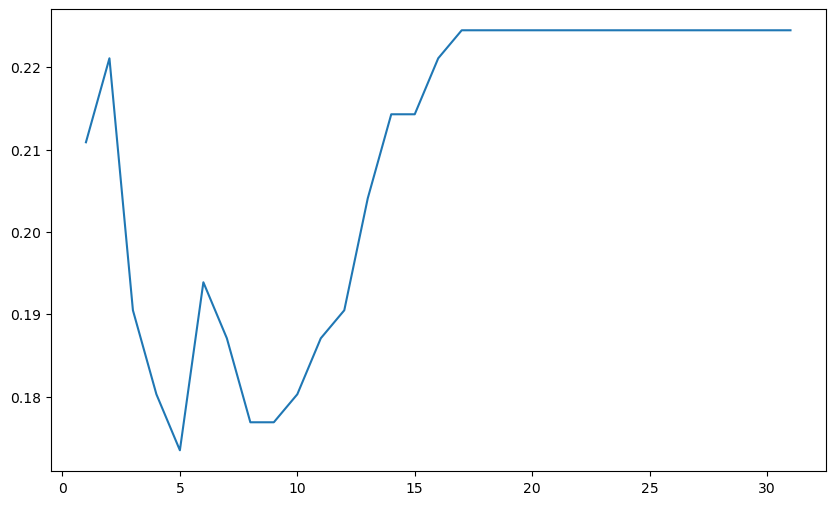

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,32), error_rate)

Ideal max_depth = 5

## Finding ideal n_estimators

In [34]:
error_rate = []

for i in range(10,201,10):
    rfc_test = RandomForestClassifier(n_estimators=i, max_depth=5, random_state=1)
    rfc_test.fit(X_train, y_train)
    pred_i = rfc_test.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

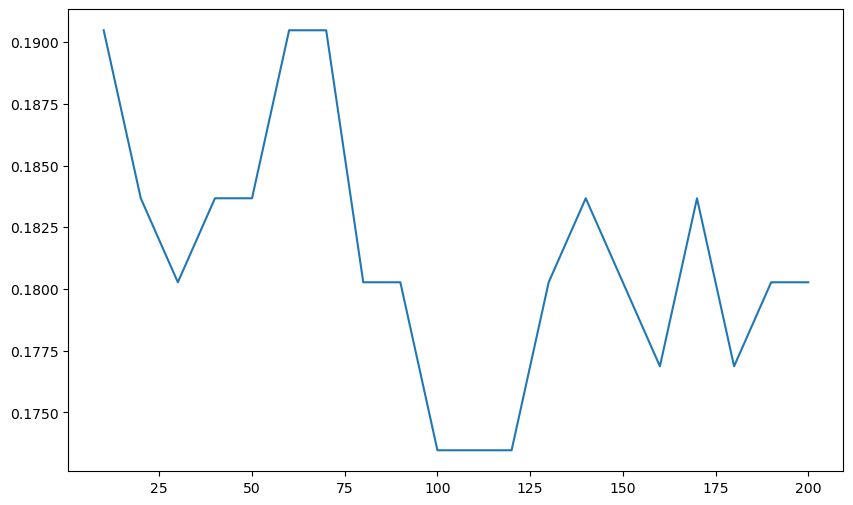

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(10,201,10), error_rate)